In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/

/content/drive/MyDrive


In [3]:
!ls

data  models.py  ncf.py  ncf_ratings.csv  neural_cf.ipynb  __pycache__	training_evolution  Vidéos


# Neural Collaborative Filtering (NCF)

This notebook allows users to train the wanted NCF model and predict the rating of some (user, item) pairs.

> Note: We implemented the three models proposed in this paper ([link](https://arxiv.org/pdf/1708.05031)). You are then allowed to use 'GMF', 'MLP' and 'NeuMF' models.

In [4]:
from ncf import *
import time

%load_ext autoreload
%autoreload 2

Define model parameters.

In [5]:
data_path = "data/train.csv"
test_path = "data/test.csv"
model_to_use = 'GMF'
val_ratio = 0.01
batch_size = 1052
embedding_dim_mlp = 2
embedding_dim_gmf = 2048
epochs = 30
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
lr = 0.006941996856698676
weight_decay = 1.977458831704696e-05
plot_folder = 'training_evolution'
start = time.time()

Initiate the selected NCF model.

In [6]:
# Initiate NCF model
ncf = NCF(data_path=data_path,
          model_to_use=model_to_use,
          val_ratio=val_ratio,
          batch_size=batch_size,
          embedding_dim_gmf=embedding_dim_gmf,
          embedding_dim_mlp=embedding_dim_mlp,
          epochs=epochs,
          device=device,
          lr=lr,
          weight_decay=weight_decay,
          plot_folder=plot_folder)

Start the training phase.

Start Training Epoch 1...
		- Train: MSE loss=6.4415, RMSE=2.5380
		- Val: MSE loss=5.2676, RMSE=2.2951
		- lr=0.0069229824

Start Training Epoch 2...
		- Train: MSE loss=3.4705, RMSE=1.8629
		- Val: MSE loss=1.9389, RMSE=1.3924
		- lr=0.0068661472

Start Training Epoch 3...
		- Train: MSE loss=1.2660, RMSE=1.1252
		- Val: MSE loss=0.9750, RMSE=0.9874
		- lr=0.0067721141

Start Training Epoch 4...
		- Train: MSE loss=0.7841, RMSE=0.8855
		- Val: MSE loss=0.7971, RMSE=0.8928
		- lr=0.0066419133

Start Training Epoch 5...
		- Train: MSE loss=0.6577, RMSE=0.8110
		- Val: MSE loss=0.7364, RMSE=0.8581
		- lr=0.0064769712

Start Training Epoch 6...
		- Train: MSE loss=0.5975, RMSE=0.7730
		- Val: MSE loss=0.7047, RMSE=0.8395
		- lr=0.0062790951

Start Training Epoch 7...
		- Train: MSE loss=0.5600, RMSE=0.7483
		- Val: MSE loss=0.6857, RMSE=0.8280
		- lr=0.0060504529

Start Training Epoch 8...
		- Train: MSE loss=0.5341, RMSE=0.7308
		- Val: MSE loss=0.6741, RMSE=0.8211
		- lr=0.0057935497



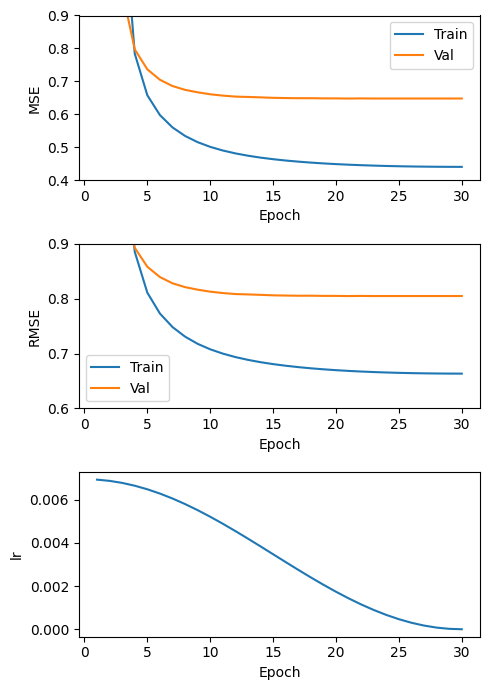

In [7]:
# Start the training
ncf.fit()

If training was successful, predict the rating of `test.csv`.

In [8]:
ncf.predict(test_path=test_path)

Pairs of (user, item) have been successfully predicted.


In [9]:
end = time.time()
elapsed_time = end - start
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)

print(f"Running this notebook took {minutes} min {seconds} sec!")

Running this notebook took 1 min 50 sec!
